# <center> **Series de tiempo**

## <center> **Coal Production**

La serie de datos de este estudio es la producción mensual de carbón bituminoso en Estados Unidos desde enero de $1952$ hasta diciembre de $1959$, un total de $96$ observaciones.

**Fuente** : Pankratz Alan (1983). Forecasting with Univariate Box - Jenkins Models, Concepts and Case. Wiley series in probability and statistics.

In [1]:
#!pip install mplcyberpunk

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
sns.set()
#import mplcyberpunk
#plt.style.use("cyberpunk")

In [18]:
data =  pd.read_csv("./CoalProduction.csv")
data.head() 

,Date,Value
0,01/01/1952,47730
1,01/02/1952,46704
2,01/03/1952,41535
3,01/04/1952,41319
4,01/05/1952,36962


In [19]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
data['Value'] = pd.to_numeric(data['Value'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    96 non-null     datetime64[ns]
 1   Value   96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [20]:
data.head()

,Date,Value
0,1952-01-01,47730
1,1952-02-01,46704
2,1952-03-01,41535
3,1952-04-01,41319
4,1952-05-01,36962


In [22]:
data.Date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                      96
unique                     96
top       1952-01-01 00:00:00
freq                        1
first     1952-01-01 00:00:00
last      1959-12-01 00:00:00
Name: Date, dtype: object

In [23]:
data = data.set_index('Date')
data.head()

,Value
Date,
1952-01-01,47730
1952-02-01,46704
1952-03-01,41535
1952-04-01,41319
1952-05-01,36962


# Frequency

| Símbolo | Descripción |
| -- | -- |
| B	 | business day frequency |
| D  |	calendar day frequency |
| W	 | weekly frequency |
| M  | month end frequency |
| BM |	business month end frequency |
| MS |	month start frequency |
| BMS|	business month start frequency |
| Q	 | quarter end frequency |
| BQ |	business quarter endfrequency |
| QS |	quarter start frequency |
| BQS|	business quarter start frequency |
| A	 | year end frequency |
| BA |	business year end frequency |
| AS |	year start frequency |
| BAS| business year start frequency |
| H	 | hourly frequency |
| T	 | minutely frequency |
| S	 | secondly frequency |
| L	 | milliseonds |
| U  |	microseconds |



**Fuente**: [pandas-docs_time series](
https://pandas.pydata.org/pandas-docs/version/0.9.1/timeseries.html)

In [24]:
yt = data.asfreq(freq='MS')
yt

,Value
Date,
1952-01-01,47730
1952-02-01,46704
1952-03-01,41535
1952-04-01,41319
1952-05-01,36962
...,...
1959-08-01,38931
1959-09-01,31020
1959-10-01,31746


# **Split data**

In [25]:
def train_test_split(data, train_size=0.85):
  size = int(len(data)*train_size)
  # split data
  X_train = data.iloc[:size]
  X_test = data.iloc[size:]
  return X_train, X_test

In [26]:
# split
X_train, X_test = train_test_split(yt, train_size=0.85)

In [27]:
print('Train : ', len(X_train))
print('Test : ', len(X_test))
print('Total : ', len(yt))

Train :  81
Test :  15
Total :  96


# **Gráfico de la serie**

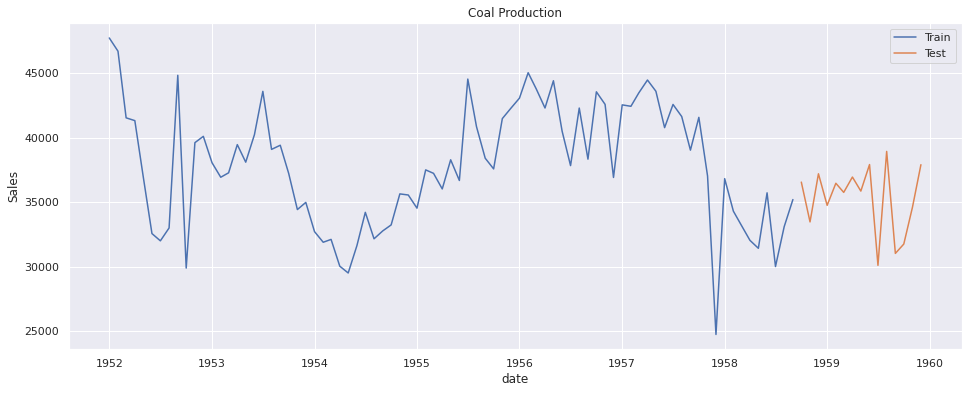

In [28]:
# gráficamos serie de entrenamiento y serie de prueba
plt.figure(figsize=(16,6))
plt.plot(X_train, label='Train')
plt.plot(X_test, label = 'Test')
plt.title('Coal Production')
plt.xlabel('date')
plt.ylabel('Sales')
plt.legend()
#mplcyberpunk.add_glow_effects()
plt.show()

Podemos observar que la varianza de la serie parece ser estacionaria. La media también parece estacionaria, ya que la serie no presenta una tendencia persistente. Sin embargo, una serie puede tener varios cambios estadísticamente significativos en su nivel general sin mostrar una tendencia clara. Veamos la función de autocorrelación muestral (ACF).

## ACF

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.tsa.stattools as sts  
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Graficamos la función de autocorrelación muestral con **plot_acf()**.

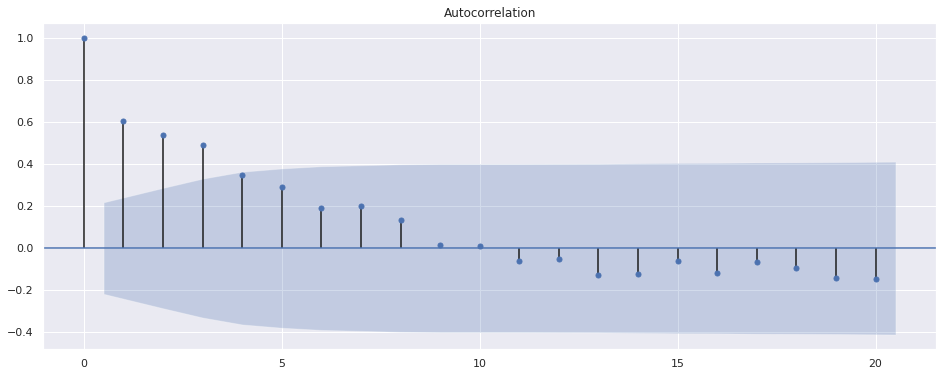

In [30]:
fig = plot_acf(X_train.Value)
fig.set_size_inches((16, 6))
plt.show()

La ACF indica que la media de los datos es estacionaria ya que las autocorrelaciones caen a cero con bastante rapidez. Sólo las cuatro primeras superan el cero en torno al nivel de significación del $5\%$, como indican la parte sombreada. Además, sólo las cinco primeras autocorrelaciones tienen valores $t$ absolutos que superan el nivel de alerta práctico de 1.6.

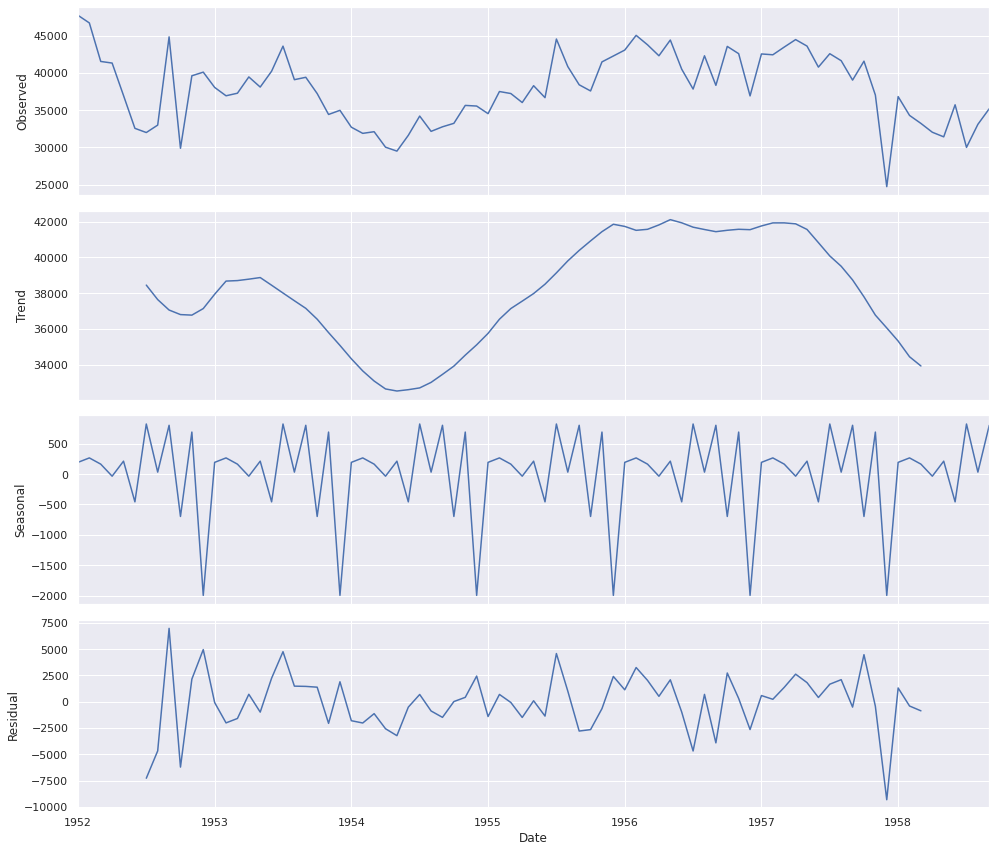

In [33]:
dec = seasonal_decompose(X_train.Value, model="additive")

fig= dec.plot()
fig.set_size_inches((14, 12))
#mplcyberpunk.add_glow_effects()
plt.tight_layout()
plt.show()

# **Prueba de estacionariedad**

La hipótesis nula de la prueba de Dickey-Fuller aumentada es:

$H_0 : θ = 0$ (significa que la serie no es estacionaria)

$H_1 : \theta < 0$ (significa que la serie es estacionaria)

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
# Augmented Dickey Fuller test
def adftest(data):
  result = adfuller(data, autolag='AIC')
  print(f'ADF Statistic: {result[0]}')
  print(f'p-value: {result[1]}')
  for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
  # result
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
  if result[0] < result[4]["5%"]:
    print ("Se rechaza Ho - La serie es estacionaria")
  else:
    print ("No se rechaza Ho - La serie no es  estacionaria")

In [36]:
adftest(X_train.Value)

ADF Statistic: -2.349169847296628
p-value: 0.15659948999299494
Critial Values:
   1%, -3.517113604831504
Critial Values:
   5%, -2.8993754262546574
Critial Values:
   10%, -2.5869547797501644
	1%: -3.517
	5%: -2.899
	10%: -2.587
No se rechaza Ho - La serie no es  estacionaria


> Si la serie no es estacionaria probamos con una diferencia y después volvemos a realizar el test, en caso de no funcionar probamos con $2$ diferencias, y nuevamente aplicamos el test.

Observe que no es necesario aplicar una transformación a la serie debido a que la varianza parece ser homogénea. 

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


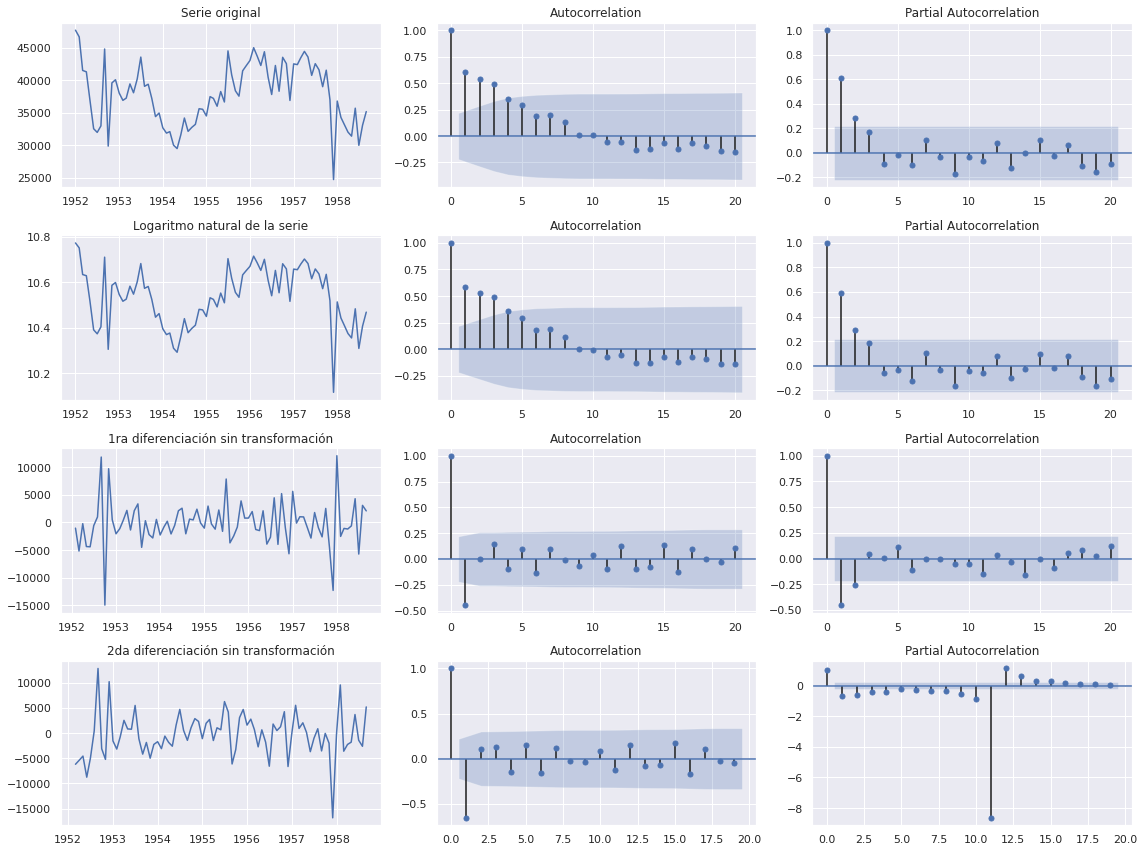

In [37]:
# Serie Original
fig, axes = plt.subplots(4,3, sharex=False, figsize=(16, 12))
axes[0, 0].plot(X_train.Value); 
axes[0, 0].set_title('Serie original')
plot_acf(X_train.Value, ax=axes[0, 1]);
plot_pacf(X_train.Value, ax=axes[0, 2]);

# Logaritmo natural de la serie
axes[1, 0].plot(np.log(X_train.Value)); 
axes[1, 0].set_title('Logaritmo natural de la serie')
plot_acf(np.log(X_train.Value), ax=axes[1, 1]);
plot_pacf(np.log(X_train.Value), ax=axes[1, 2]);

# 1ra diferenciación
axes[2, 0].plot(X_train.Value.diff()); 
axes[2, 0].set_title('1ra diferenciación sin transformación')
plot_acf(X_train.Value.diff().dropna(), ax=axes[2, 1]);
plot_pacf(X_train.Value.diff().dropna(), ax=axes[2, 2]);

# 2da diferenciación
axes[3, 0].plot(X_train.diff(2)); 
axes[3, 0].set_title('2da diferenciación sin transformación')
plot_acf(X_train.Value.diff().diff().dropna(), ax=axes[3, 1]);
plot_pacf(X_train.Value.diff().diff().dropna(), ax=axes[3, 2]);
plt.tight_layout()
plt.show()


Vamos a probar con la primera diferenciación, y en caso de no funcionar, probamos con la segunda diferenciación. Además aplicamos transformación logarítmica a la serie original, y después hacemos la diferenciación, y eliminamos el valor NA que se genere al diferenciar la serie.

In [38]:
X_train_diff =  X_train.diff().dropna()

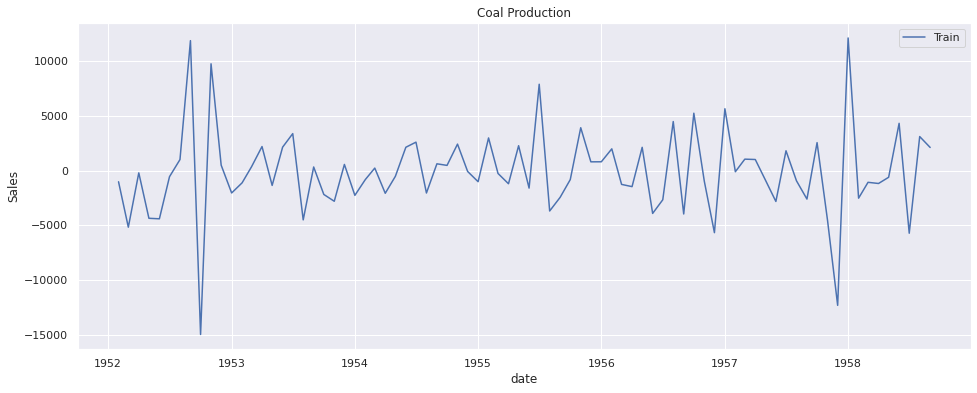

In [39]:
# gráficamos serie con una diferencia
plt.figure(figsize=(16,6))
plt.plot(X_train_diff, label='Train')
plt.title('Coal Production')
plt.xlabel('date')
plt.ylabel('Sales')
plt.legend()
#mplcyberpunk.add_glow_effects()
plt.show()

In [40]:
adftest(X_train_diff.Value)

ADF Statistic: -9.678407557784428
p-value: 1.2230774395270986e-16
Critial Values:
   1%, -3.517113604831504
Critial Values:
   5%, -2.8993754262546574
Critial Values:
   10%, -2.5869547797501644
	1%: -3.517
	5%: -2.899
	10%: -2.587
Se rechaza Ho - La serie es estacionaria


# **Estimación**

Una vez comprobada la estacionariedad de la serie e identificando el orden del modelo, procedemos a la estimación de los parámetros.

In [41]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2

> *SARIMAX(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, ...)*

**Parámetros:**

- **endog** : El proceso de la serie temporal observada.
- **exog** : Conjunto de regresores exógenos.
- **order** : El orden $(p,d,q)$ del modelo para los componentes autorregresivos $(p)$, diferencias $(d)$ y el orden de media móvil $(q)$. $d$ es siempre un entero, mientras que $p$ y $q$ pueden ser enteros o listas de enteros.
- **seasonal_order** : El orden $(P,D,Q,s)$ del componente estacional del modelo para los parámetros **AR(P)**, las diferencias **I(D)**, los parámetros de media móvil **MA(Q)** y la periodicidad $(s)$. Por defecto es $(0, 0, 0, 0)$. $D$ y $s$ son siempre enteros, mientras que $P$ y $Q$ pueden ser enteros o listas de enteros positivos.
- **trend** : Parámetro que controla la tendencia determinista. Puede especificarse como una cadena en la que **c** indica un término constante, **t** indica una tendencia lineal en el tiempo, y **ct** incluye ambos.
- **enforce_stationarity** : Requerir o no que los parámetros autorregresivos correspondan a un proceso estacionario.
- **enforce_stationarity** :  Requerir o no que los parámetros de media móvil correspondan a un proceso invertible.


In [42]:
model = SARIMAX(X_train, order=(1,1,1), seasonal_order=(0,0, 0, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  Value   No. Observations:                   81
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -771.713
Date:                Sun, 24 Jul 2022   AIC                           1549.426
Time:                        00:16:59   BIC                           1556.572
Sample:                    01-01-1952   HQIC                          1552.291
                         - 09-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4348      0.112      3.868      0.000       0.214       0.655
ma.L1         -0.7381      0.124     -5.948      0.000      -0.981      -0.495
sigma2       1.24e+07   2.38e-10   5.22e+16      0.000    1.24e+07    1.24e+07
===================================================================================
Ljung-Box (Q):                       32.27   Jarque-Bera (JB):                30.31
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.26
Prob(H) (two-sided):                  0.67   Kurtosis:                         5.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# **Evaluación del modelo**

Una vez estimado el modelo procedemos a validar que cumpla con los supuestos con respecto a los residuales:
- Que se distribuyan de forma normal.
- Que sean independientes.
- Que no estén correlacionados.
- Que tengan media cero y varianza constante.

## **Proeba de autocorrelación Ljung-Box Test**
A veces es importante probar si los valores de una serie temporal, digamos $u_t$, son independientes. Podemos decir que existe un patrón de autocorrelación si las series están seriamente correlacionadas. Una prueba muy utilizada para verificar si una serie de valores está correlacionada es el estadístico de **Ljung Box**, que se basa en la autocorrelación como conjunto. Supongamos que nos dan $m$ valores autocorrelacionados.  Probamos la siguiente hipótesis nula conjunta sobre las correlaciones entre los valores


\begin{equation}
H_0 : \rho_1 = ... = \rho_k = 0
\end{equation}
el estadístico
\begin{equation}
Q  =  n(n+2) \sum_{k=1}^{m} \frac{\hat{\rho}_k^2}{(n-k)} 
\end{equation} 
donde $m$ es el número de rezagos (lags), and $\hat{\rho}_k^2$ representa  $\hat{Cov} (u_t, u_{t+k})$ for $k=1,...,m$. 

**Referencia**: Pankratz($1983$).

## **Prueba de normalidad Jarque-Bera**

La prueba de normalidad Jarque-Bera es una prueba estadística  que  se emplea para ver si una determinada serie de tiempo se distribuye de forma normal.

El estadístico de prueba Jarque-Bera se define como
\begin{equation*}
JB =[(n-k+1) / 6] * [S^2 + (0,25*(C-3)2)]
\end{equation*}

Bajo la hipótesis nula de normalidad, la prueba Jarque-Bera(JB) $\sim \chi^2(2)$

donde $n$ denota el número de observaciones en la muestra, $k$ denota el número de regresores ($k=1$ si no se utiliza en una regresión), $S$ denota la asimetría de la muestra y $C$ denota la curtosis de la muestra.

La hipótesis nula es
\begin{equation}
H_0 : \text{La serie sigue una distribución normal}
\end{equation}

## **Prueba de heterocedasticidad Goldfeld-Quandt**

La heterocedasticidad en la situación en la que la variabilidad de una serie es desigual para un rango de valores distinto. 

La prueba **Goldfeld-Quandt** se utiliza para probar la presencia de heteroscedasticidad en los datos dados. 

La hipótesis nula es
\begin{equation}
H_0 : \text{No hay presencia de heterocedasticidad}
\end{equation}



**Observación:**

Una prueba de hipótesis se rechaza mediante:
- El estadístico de prueba.
- El p-valor. Se rechaza si p-valor < $\alpha$ 

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAXResults


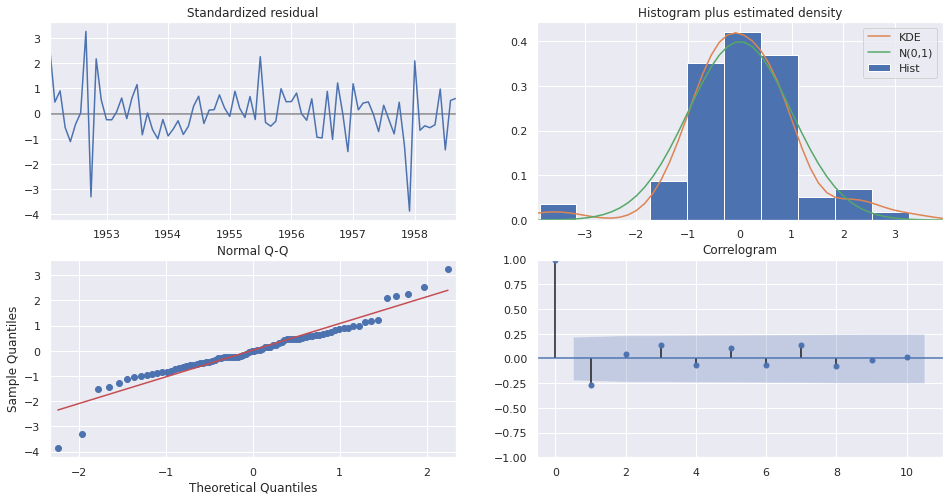

In [44]:
model.plot_diagnostics(figsize=(16,8));
plt.show()

Con respecto a lo anterior, considerando un nivel de significancia (el límite para juzgar un resultado como estadísticamente significativo) $\alpha=0.05$
- 

In [45]:
# Predicciones del conjunto train
forc = model.get_prediction(step=1)

conficence_int = forc.conf_int()
forecast = forc.prediction_results
print(conficence_int)

             lower Value   upper Value
Date                                  
1952-01-01  -7540.636849   7540.636849
1952-02-01  30476.154119  44681.472833
1952-03-01  32895.394013  46905.913888
1952-04-01  31160.948391  45073.255239
1952-05-01  31968.992819  45829.936169
...                  ...           ...
1958-05-01  26074.293098  39875.649094
1958-06-01  25397.920265  39199.276260
1958-07-01  28164.345719  41965.701714
1958-08-01  24351.716351  38153.072346
1958-09-01  26180.313383  39981.669379

[81 rows x 2 columns]


In [46]:
# Predicción del conjunto test 
n = len(X_test)
forec = model.get_forecast(n)

conficence_int = (forec.conf_int())
forecast = (forec.predicted_mean)
print(conficence_int)

             lower Value   upper Value
1958-10-01  27647.391008  41448.747003
1958-11-01  25855.901302  42676.812612
1958-12-01  24873.993266  43413.751110
1959-01-01  24181.135108  44000.099668
1959-02-01  23613.290214  44521.635561
1959-03-01  23108.009043  45006.782175
1959-04-01  22639.090949  45466.946023
1959-05-01  22194.662150  45907.568588
1959-06-01  21768.846164  46331.729673
1959-07-01  21358.394451  46741.461857
1959-08-01  20961.272656  47138.270809
1959-09-01  20576.049569  47523.357876
1959-10-01  20201.623774  47897.724532
1959-11-01  19837.095327  48262.227265
1959-12-01  19481.701219  48617.610194


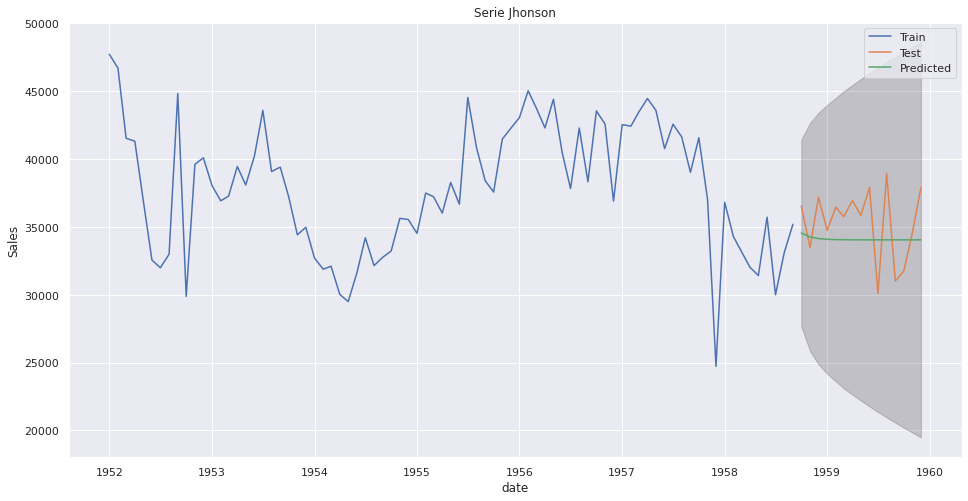

In [47]:
# gráficamos serie de entrenamiento y serie de prueba
plt.figure(figsize=(16,8))
plt.plot(X_train, label='Train')
plt.plot(X_test, label = 'Test')
plt.plot(forecast, label = 'Predicted')
plt.fill_between(forecast.index, conficence_int.iloc[:, 0], conficence_int.iloc[:, 1], color='k', alpha=.2)
plt.title('Serie Jhonson')
plt.xlabel('date')
plt.ylabel('Sales')
plt.legend()
#mplcyberpunk.add_glow_effects()
plt.show()

## **Métricas de error**

Para obtener la métricas de error, empleamos la siguiente función:

In [48]:
# obtenemos los residuos del modelo
residuals = model.resid

In [49]:
# función para obtener las métricas de error
def metrics_eval(model):
  residuals = model.resid
  aic = model.aic
  bic = model.bic
  mse = np.mean(residuals**2)
  rmse = np.sqrt(mse)
  mae = np.mean(np.abs(residuals))
  result = {'Metric': ['AIC', 'BIC', 'MSE', 'RMSE', 'MAE'], 'Values': [aic, bic, mse, rmse, mae]}
  return pd.DataFrame(result)


In [50]:
metrics = metrics_eval(model)
metrics

,Metric,Values
0,AIC,1.549426e+03
1,BIC,1.556572e+03
2,MSE,4.190804e+07
3,RMSE,6.473642e+03
4,MAE,3.222437e+03


# **Predicción de valores futuros (Forecasting)**

In [51]:
model = SARIMAX(yt, order=(1,1,1), seasonal_order=(0,0,0,0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  Value   No. Observations:                   96
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -915.848
Date:                Sun, 24 Jul 2022   AIC                           1837.696
Time:                        00:18:22   BIC                           1845.358
Sample:                    01-01-1952   HQIC                          1840.792
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3774      0.088      4.268      0.000       0.204       0.551
ma.L1         -0.7365      0.105     -7.007      0.000      -0.942      -0.530
sigma2      1.178e+07   6.23e-10   1.89e+16      0.000    1.18e+07    1.18e+07
===================================================================================
Ljung-Box (Q):                       28.36   Jarque-Bera (JB):                29.38
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.28
Prob(H) (two-sided):                  0.85   Kurtosis:                         5.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
# Forecast h period ahead
n = 10
forec = model.get_forecast(n)

conficence_int = (forec.conf_int()) # intervalos de confianza
forecast = (forec.predicted_mean) # predicción
print(conficence_int)

             lower Value   upper Value
1960-01-01  29785.315962  43236.750067
1960-02-01  27998.026829  43974.958771
1960-03-01  27107.008093  44470.079707
1960-04-01  26510.441942  44917.243520
1960-05-01  26028.538544  45342.766057
1960-06-01  25598.659354  45751.368462
1960-07-01  25197.222519  46144.775949
1960-08-01  24814.657938  46524.310446
1960-09-01  24446.635309  46891.189595
1960-10-01  24090.868857  47246.524525


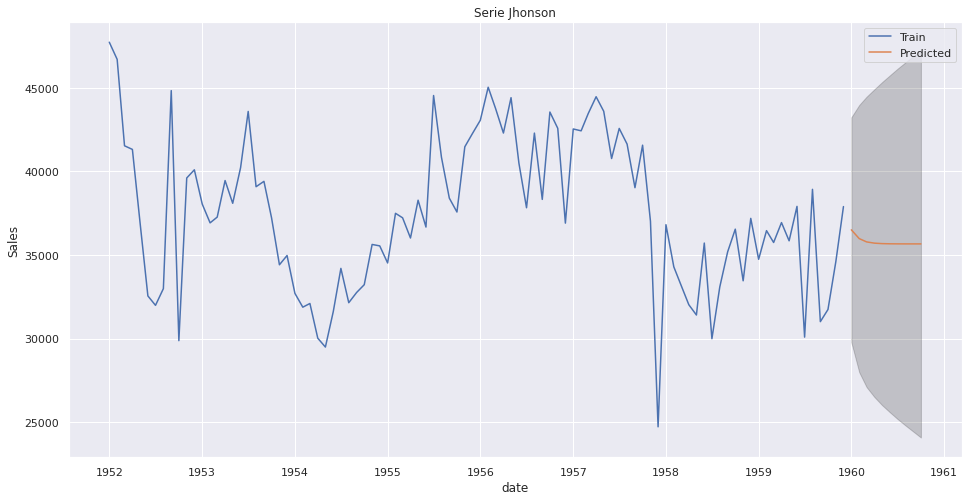

In [53]:
# gráficamos serie de entrenamiento y serie de prueba
plt.figure(figsize=(16,8))
plt.plot(yt, label='Train')
plt.plot(forecast, label = 'Predicted')
plt.fill_between(forecast.index, conficence_int.iloc[:, 0], conficence_int.iloc[:, 1], color='k', alpha=.2)
plt.title('Serie Jhonson')
plt.xlabel('date')
plt.ylabel('Sales')
plt.legend()
#mplcyberpunk.add_glow_effects()
plt.show()

## Modelo

El modelo $ARIMA(1,1,1)$ se expresa como:
\begin{equation*}
(1 - \phi_1 B)(1-B)z_t = (1 - \theta_1 B) u_t
\end{equation*}

# Auto ARIMA

In [ ]:
#!pip install pmdarima
#!pip install pyramid
!pip install pyramid-arima

In [ ]:
import pmdarima as pm

In [ ]:
model = pm.auto_arima(yt, start_p=0, start_q=0,
                      test='adf',       #adftest para encontrar el valor óptimo de 'd'
                      max_p=5, max_q=5, # máx p y q
                      m=4,              # frecuencia de la serie
                      d=1,              # diferenciación de la parte regular (no estacional)
                      seasonal=True,    # 
                      start_P=0, start_Q=0,  # valores de inicip de P y Q de la parte estacional 
                      D=0,                   # Diferenciación de la parte estacional 
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Observamos que el método $auto\_arima()$ nos lleva a la solución:

El modelo $ARIMA(1,1,1)$, y se expresa como:
\begin{equation*}
(1 - \phi_1 B)(1-B)z_t = (1 - \theta_1 B) u_t
\end{equation*}